In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow import keras
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [209]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [210]:
file_1 = '대한민국일별데이터.csv'

In [211]:
df1 = pd.read_csv(file_1, encoding = 'UTF-8')

In [212]:
df1.head()

,지점,지점명,일시,강수량(mm),평균기온(℃),평균습도(%rh),일조율(%)
0,105,강릉,2018-01-01,NaN,1.3,19.8,94.8
1,105,강릉,2018-01-02,NaN,2.5,22.4,90.6
2,105,강릉,2018-01-03,NaN,-0.4,26.1,93.8
3,105,강릉,2018-01-04,NaN,0.1,44.6,59.8
4,105,강릉,2018-01-05,NaN,2.2,35.6,78.4


In [213]:
df_korea = df1.drop(['지점', '지점명'], axis = 1).groupby(['일시']).mean()
df_korea.head()

,강수량(mm),평균기온(℃),평균습도(%rh),일조율(%)
일시,,,,
2018-01-01,NaN,1.168750,46.93750,85.50625
2018-01-02,0.00,1.680000,52.74000,61.14375
2018-01-03,NaN,-0.293333,41.82000,84.58750
2018-01-04,0.60,-0.712500,49.28750,46.83750
2018-01-05,1.25,1.018750,53.46875,65.92500


In [214]:
df_korea.tail()

,강수량(mm),평균기온(℃),평균습도(%rh),일조율(%)
일시,,,,
2023-08-06,5.112500,29.40625,74.78750,61.69375
2023-08-07,6.188889,29.28750,74.49375,55.39375
2023-08-08,2.175000,29.08125,71.57500,58.05625
2023-08-09,25.306250,26.48125,81.06250,10.72500
2023-08-10,105.268750,23.74375,88.73125,4.68125


In [215]:
#강수량 결측치 대체
filter1 = df_korea['강수량(mm)'].isna() == True
df_korea['강수량(mm)'][filter1] = 6.394135

In [216]:
df_korea.describe()

,강수량(mm),평균기온(℃),평균습도(%rh),일조율(%)
count,2048.000000,2048.000000,2048.000000,2048.000000
mean,6.394135,14.417099,66.496603,55.284131
std,10.472229,9.261077,13.529116,27.482624
min,0.000000,-10.506250,32.150000,0.000000
25%,0.376667,6.954688,55.912500,33.370312
50%,3.933333,14.743750,67.018750,62.243750
75%,6.394135,22.525000,77.142188,78.982812
max,105.268750,30.818750,96.025000,92.643750


In [217]:
df_korea = df_korea.reset_index()

,일시,강수량(mm),평균기온(℃),평균습도(%rh),일조율(%)
0,2018-01-01,6.394135,1.168750,46.93750,85.50625
1,2018-01-02,0.000000,1.680000,52.74000,61.14375
2,2018-01-03,6.394135,-0.293333,41.82000,84.58750
3,2018-01-04,0.600000,-0.712500,49.28750,46.83750
4,2018-01-05,1.250000,1.018750,53.46875,65.92500
...,...,...,...,...,...
2043,2023-08-06,5.112500,29.406250,74.78750,61.69375
2044,2023-08-07,6.188889,29.287500,74.49375,55.39375
2045,2023-08-08,2.175000,29.081250,71.57500,58.05625
2046,2023-08-09,25.306250,26.481250,81.06250,10.72500


((array([-3.06802067, -2.79249593, -2.63802808, -2.52872946, -2.44323443,
         -2.37256753, -2.31207431, -2.25901834, -2.2116494 , -2.16877784,
         -2.12955693, -2.09336185, -2.05971787, -2.02825552, -1.99868145,
         -1.97075867, -1.94429289, -1.91912278, -1.89511285, -1.87214817,
         -1.85013036, -1.82897457, -1.80860704, -1.78896329, -1.76998654,
         -1.75162658, -1.73383877, -1.71658323, -1.69982416, -1.68352936,
         -1.66766969, -1.65221872, -1.63715242, -1.62244883, -1.60808787,
         -1.59405109, -1.58032155, -1.5668836 , -1.55372278, -1.5408257 ,
         -1.52817994, -1.51577394, -1.50359694, -1.4916389 , -1.47989043,
         -1.46834275, -1.45698761, -1.44581729, -1.43482451, -1.42400244,
         -1.41334462, -1.40284496, -1.39249772, -1.38229746, -1.37223902,
         -1.36231753, -1.35252836, -1.34286711, -1.3333296 , -1.32391186,
         -1.3146101 , -1.30542071, -1.29634026, -1.28736545, -1.27849316,
         -1.26972038, -1.26104425, -1.

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


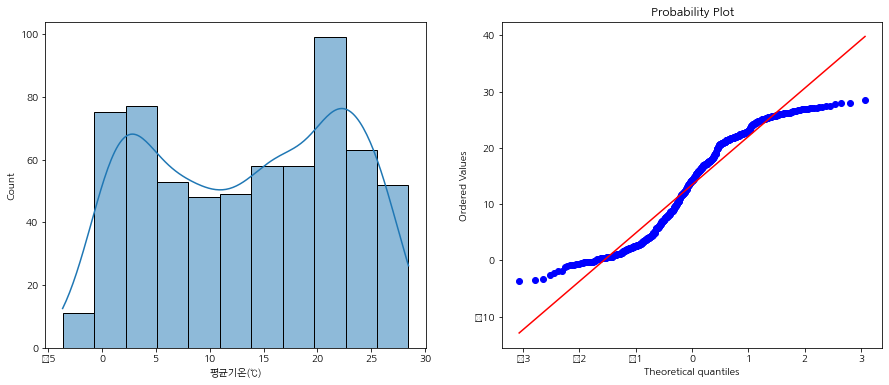

In [152]:
fig, axes = plt.subplots(1,2, figsize = (15,6))

sns.histplot(df_korea['평균기온(℃)'], ax =axes[0], kde=True)
stats.probplot(df_korea["평균기온(℃)"], dist='norm', fit=True, plot=axes[1])


# 오른쪽 파란색 곡선이 빨간색 직선에 비슷해 질수록 정규분포를 따른다 ==> 그다지 정확하지는 않지만, 얼추 따른다고 생각

/home/jjam/.local/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, '상관도 Heatmap')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


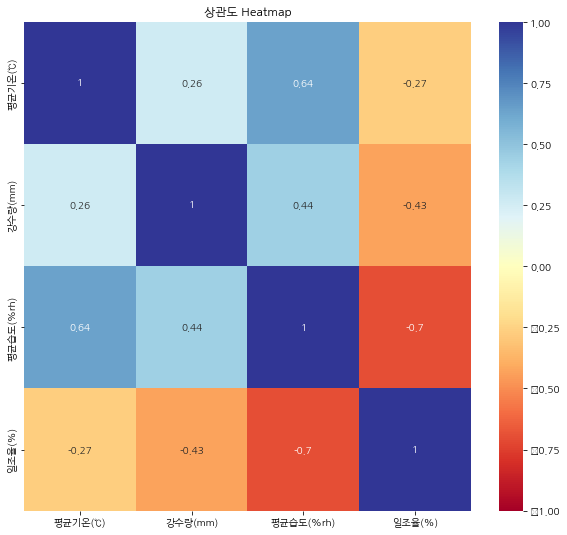

In [204]:
# 상관도를 보기위해 heatmap 
fig, axe = plt.subplots(figsize=(10,9))
axe = sns.heatmap(df_korea[['평균기온(℃)', '강수량(mm)', '평균습도(%rh)', '일조율(%)']].corr(), cmap='RdYlBu', annot=True, vmin=-1, vmax=1)
axe.set_title('상관도 Heatmap')

# (강수량, 평균풍속, 평균습도, 일조율)를 집중적으로 보자

In [154]:
before_2010 = pd.get_dummies(before_2010, columns=['month'])
after_2010 = pd.get_dummies(after_2010, columns=['month'])

In [165]:
X_train = before_2010.drop(['일시', '평균기온(℃)', '날짜', 'year', '평균풍속\n(m/s)'], axis = 1)
X_test = after_2010.drop(['일시', '평균기온(℃)', '날짜', 'year', '평균풍속\n(m/s)'], axis = 1)

y_train = before_2010['평균기온(℃)']
y_test = after_2010['평균기온(℃)']

In [166]:
X_train

,강수량(mm),평균습도(%rh),일조율(%),month_1.0,month_2.0,month_3.0,month_4.0,month_5.0,month_6.0,month_7.0,month_8.0,month_9.0,month_10.0,month_11.0,month_12.0
0,5.55625,62.8125,65.514375,True,False,False,False,False,False,False,False,False,False,False,False
1,58.61250,63.4375,57.244375,False,True,False,False,False,False,False,False,False,False,False,False
2,14.50000,55.8750,63.674375,False,False,True,False,False,False,False,False,False,False,False,False
3,81.46250,65.0000,53.553750,False,False,False,True,False,False,False,False,False,False,False,False
4,122.29375,70.6250,47.855000,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,156.45625,75.3750,37.930000,False,False,False,False,False,False,False,True,False,False,False,False
476,49.03750,71.6875,49.231250,False,False,False,False,False,False,False,False,True,False,False,False
477,50.43750,62.5000,66.046875,False,False,False,False,False,False,False,False,False,True,False,False
478,61.49375,65.0625,44.178125,False,False,False,False,False,False,False,False,False,False,True,False


/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


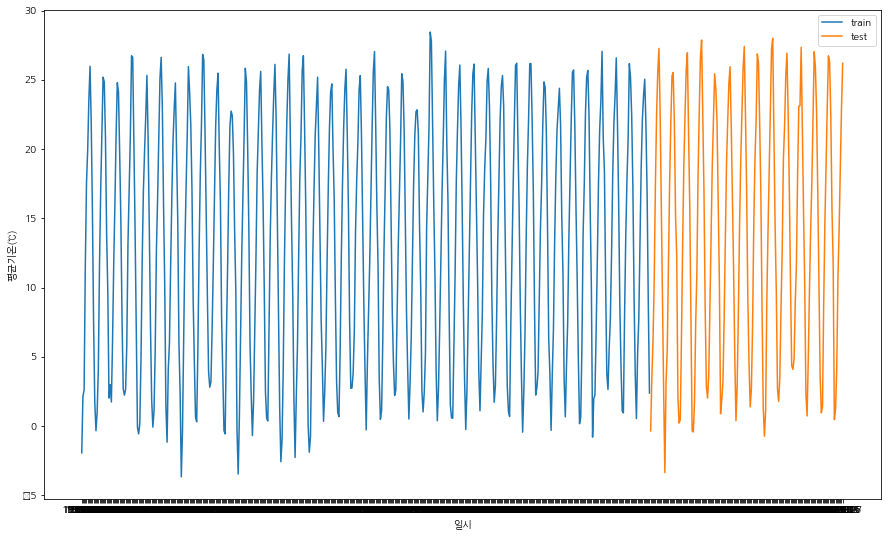

In [167]:
fig, axe = plt.subplots(figsize = (15,9))
axe = sns.lineplot(x = df_korea['일시'], y = y_train, label = 'train')
axe = sns.lineplot(x = df_korea['일시'], y = y_test, label = 'test')

In [168]:
for m in [SGDRegressor(max_iter=1000), Ridge(alpha = 0.1), 
          Lasso(alpha = 10), LinearRegression()]:
    m.fit(X_train, y_train)
    print(m.coef_) # 기울기
    print(m.intercept_) # y절편
    print('train score : ', m.score(X_train, y_train))
    print('test score : ', m.score(X_test, y_test))
    print('=================================================')
    print('')

[ 1.18542548e+09  3.72122956e+10 -9.24141812e+10 -1.49098728e+10
 -4.76507122e+10  4.07725842e+10 -2.93531273e+10 -6.84883020e+10
  2.39555142e+10 -2.13255325e+10  3.05237870e+10  4.75690240e+10
  4.04251030e+10 -9.03015653e+09 -1.76535202e+10]
[-2.51909972e+10]
train score :  -7.010548747152963e+22
test score :  -9.438799170732289e+22

[-9.98945002e-04 -8.46230122e-03 -2.45152756e-02 -1.29576034e+01
 -1.11750001e+01 -6.79608981e+00 -5.91084941e-01  4.21849049e+00
  7.95898288e+00  1.13674169e+01  1.23302706e+01  8.01390155e+00
  2.42627142e+00 -4.37306321e+00 -1.04224924e+01]
15.1687968238405
train score :  0.9812968355912489
test score :  0.9704155143087093

[ 0.04191553  0.29027793  0.         -0.         -0.         -0.
  0.          0.          0.          0.          0.          0.
  0.         -0.         -0.        ]
-11.23994729032382
train score :  0.6033588328685542
test score :  0.623284542835514

[-1.34872855e-03 -1.59938297e-02 -2.64517560e-02 -1.30614620e+01
 -1.12747744